IMPORTING LIBRARIES AND DATASET

In [1]:
# importation of libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

**IMPORTATION OF DATASET**

In [2]:
#Importing required libraries
import pandas as pd
import numpy as np
#Importing data as dataframe
data = pd.read_csv('/content/drive/MyDrive/Mortalityrateforyoungandinfant.csv')
#Printing data
print(data.head())

   Year  Alcohol-related and drug-related  Congenital malformations  \
0  2001                               176                       260   
1  2002                               156                       236   
2  2003                               128                       217   
3  2004                               105                       221   
4  2005                               120                       243   

   Diseases of the respiratory system  Infectious diseases  Injuries  \
0                                 191                  232      1192   
1                                 191                  177      1162   
2                                 173                  195      1114   
3                                 171                  191      1107   
4                                 178                  186      1096   

   Pregnancy  
0        355  
1        363  
2        350  
3        373  
4        362  


**DATASET DISPLAY**
This is to the attributes/ columns in the dataset and a description of their dataset

In [3]:
# Dataset  Display
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Year                                20 non-null     int64
 1   Alcohol-related and drug-related    20 non-null     int64
 2   Congenital malformations            20 non-null     int64
 3   Diseases of the respiratory system  20 non-null     int64
 4   Infectious diseases                 20 non-null     int64
 5   Injuries                            20 non-null     int64
 6   Pregnancy                           20 non-null     int64
dtypes: int64(7)
memory usage: 1.2 KB
None


Missing values in each column:
 Year                                  0
Alcohol-related and drug-related      0
Congenital malformations              0
Diseases of the respiratory system    0
Infectious diseases                   0
Injuries                              0
Pregnancy                             0
dtype: int64
Total number of missing values: 0


<Axes: >

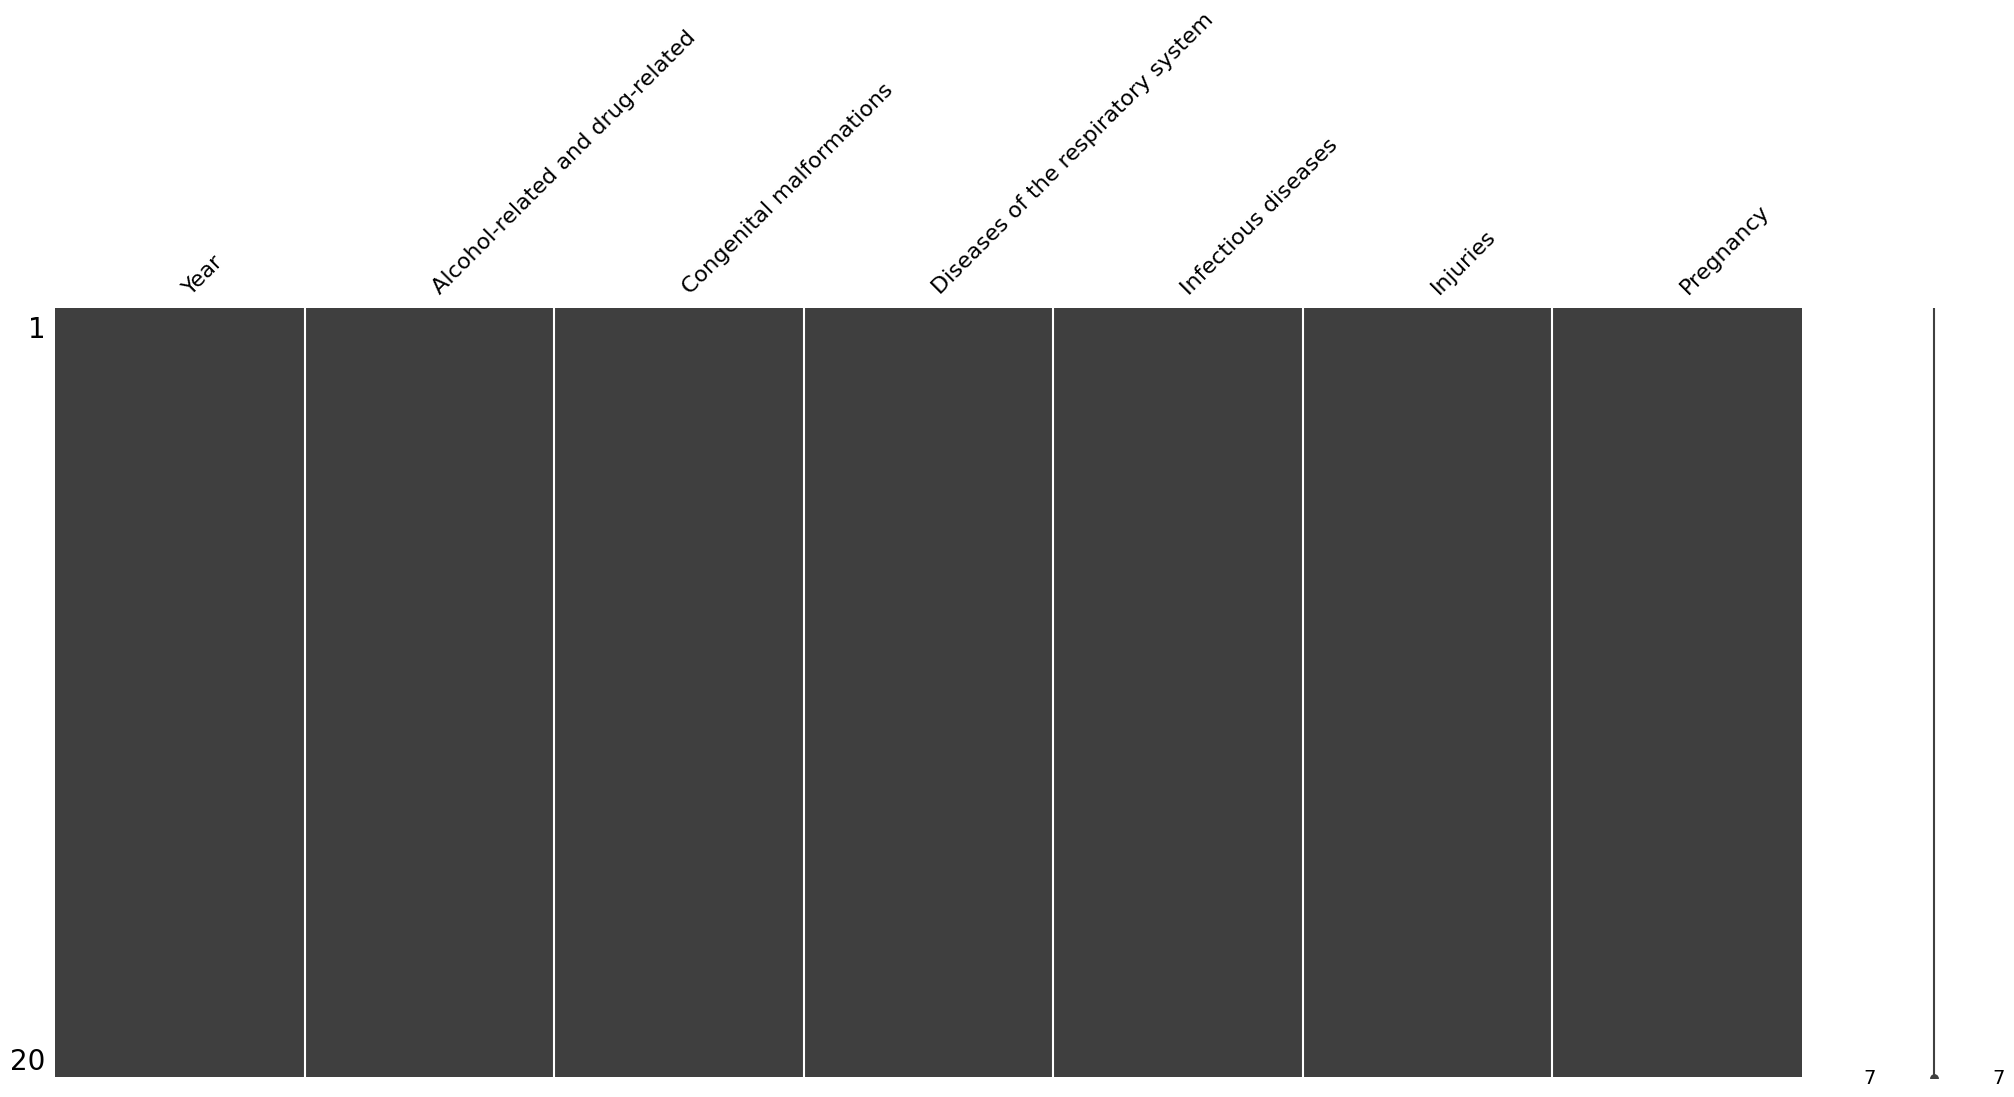

In [4]:
# Check for missing values
import missingno as msno
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Total number of missing values in the entire DataFrame
total_missing = data.isnull().sum().sum()
print(f'Total number of missing values: {total_missing}')

# Visualize missing data
msno.matrix(data)

In [5]:
# Calculate the total mortality for each year
data['Total Mortality'] = data[['Alcohol-related and drug-related', 'Congenital malformations', 'Diseases of the respiratory system',
                            'Infectious diseases', 'Injuries', 'Pregnancy' ]].sum(axis=1)

print(data[['Year', 'Total Mortality']])

    Year  Total Mortality
0   2001             2406
1   2002             2285
2   2003             2177
3   2004             2168
4   2005             2185
5   2006             2011
6   2007             2035
7   2008             1975
8   2009             1913
9   2010             1646
10  2011             1578
11  2012             1470
12  2013             1366
13  2014             1453
14  2015             1446
15  2016             1360
16  2017             1333
17  2018             1359
18  2019             1266
19  2020             1112


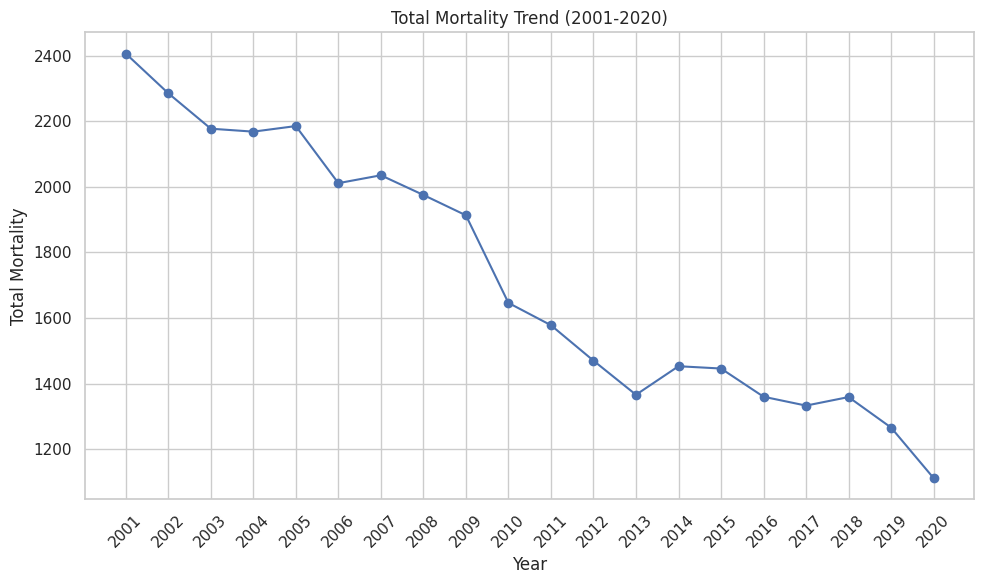

In [13]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Total Mortality'], marker='o', color='b', linestyle='-')
plt.title('Total Mortality Trend (2001-2020)')
plt.xlabel('Year')
plt.ylabel('Total Mortality')
plt.grid(True)
plt.xticks(data['Year'], rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Showing the plot
plt.show()


**VISUALIZATION OF MORTALITY TREND**

<function matplotlib.pyplot.show(close=None, block=None)>

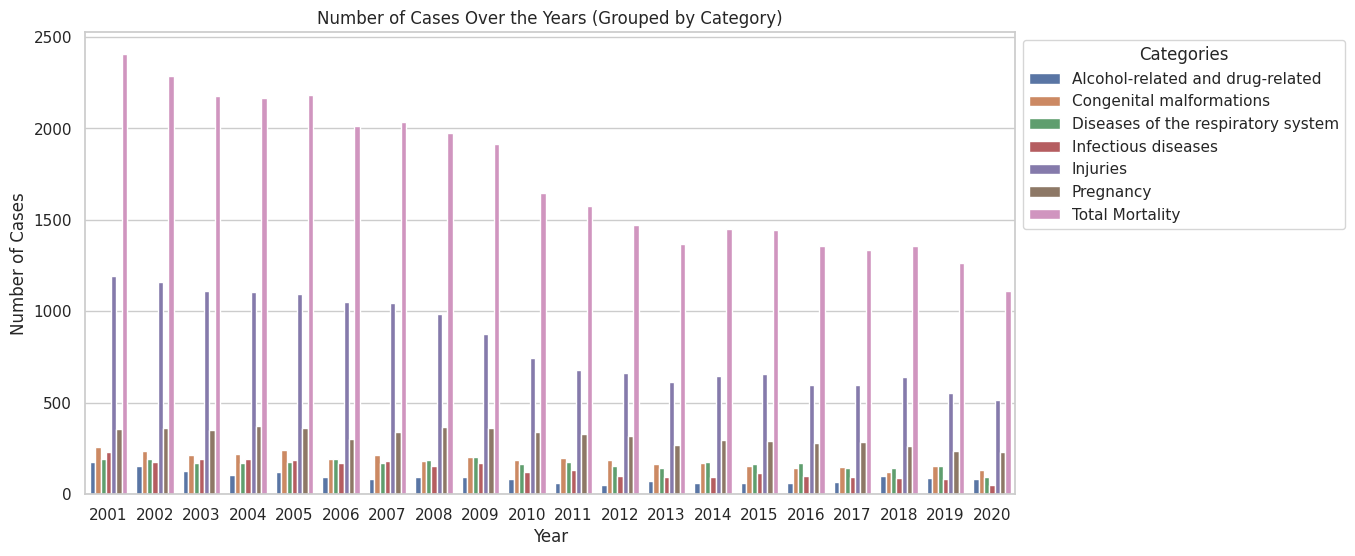

In [7]:
# visualization of data set
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style for seaborn
sns.set(style="whitegrid")

# Plotting a grouped bar plot for all columns
plt.figure(figsize=(12, 6))
sns.barplot(data=data.set_index('Year').stack().reset_index(), x='Year', y=0, hue='level_1')
plt.title('Number of Cases Over the Years (Grouped by Category)')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend(title='Categories', loc='upper left', bbox_to_anchor=(1, 1))
plt.show

**LEADING CAUSE FOR MORTALITY FROM 2001 TO 2020**

In [40]:
# Aggregate data
data_aggregated = data.drop('Year', axis=1).sum()

# Calculate percentages
data_percentage = data_aggregated / data_aggregated.sum() * 100

# Rank categories based on percentages
data_ranked = data_percentage.sort_values(ascending=False)

print("\nCategory Ranking based on Percentage Contribution:")
print(data_ranked)


Category Ranking based on Percentage Contribution:
Injuries                             48
Pregnancy                            18
Congenital malformations             11
Diseases of the respiratory system   10
Infectious diseases                   8
Alcohol-related and drug-related      5
dtype: float64


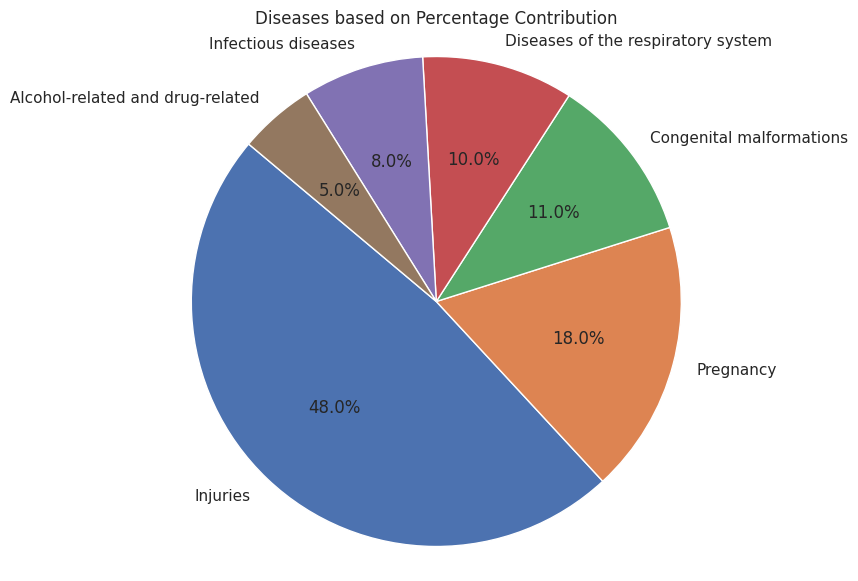

In [41]:
# Data
categories = [
    'Injuries',
    'Pregnancy',
    'Congenital malformations',
    'Diseases of the respiratory system',
    'Infectious diseases',
    'Alcohol-related and drug-related'
]
percentages = [
    48,
    18,
    11,
    10,
    8,
    5
]

# Create pie chart
plt.figure(figsize=(10, 7))
plt.pie(percentages, labels=categories, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title
plt.title('Diseases based on Percentage Contribution')

# Display the pie chart
plt.show()

R^2 Score: 0.9494715428923322
Mean Squared Error: 1.6800711988299544


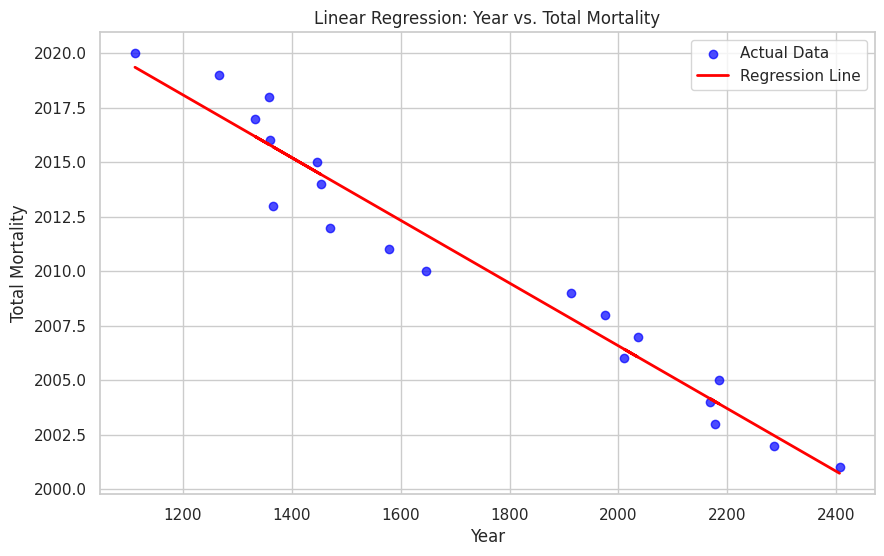

In [38]:
# Set independent variable (X) and dependent variable (y)
y = data['Year'].values.reshape(-1, 1)  # Reshape for sklearn
X = data['Total Mortality'].values.reshape(-1, 1)

# Training the model using the entire dataset
model = LinearRegression()
model.fit(X, y)

# Make predictions on the entire dataset
y_pred = model.predict(X)

# Evaluate the model
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
print(f'R^2 Score: {r2}')
print(f'Mean Squared Error: {mse}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, label='Actual Data', color='blue')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Year vs. Total Mortality')
plt.xlabel('Year')
plt.ylabel('Total Mortality')
plt.legend()
plt.grid(True)
plt.show()